# Model Building

## Attaching Resources

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier,VotingClassifier,StackingClassifier, BaggingClassifier
from sklearn.svm import SVC
import pickle

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 3750x2000 with 0 Axes>

### Adding Dataset

In [2]:
wp= pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Predict_Health_Outcomes_of_Horses/main/Feature%20Engineering%20%26%20Feature%20Extraction/Feature.csv')

wp

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,...,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,outcome
0,-2.575515,0.497439,0.437356,-0.322301,-0.465205,-1.730869,-0.237628,-0.584094,0.445372,0.175977,...,-0.500667,0.573039,0.338492,0.558939,0.045085,0.414778,-0.260684,0.914446,0.711410,0
1,-0.969471,-1.600627,-1.003945,1.657998,-0.053170,-0.631209,0.006702,1.559572,0.895931,1.338742,...,0.225546,-0.180210,0.968270,0.467613,1.102725,-0.627489,-0.165612,0.817375,1.137071,1
2,-1.011043,-0.007678,-1.232201,-2.432332,1.080307,1.153215,-0.767159,1.575246,-0.214572,0.564828,...,0.102726,0.743997,-0.992582,-1.176858,0.234520,-0.364848,0.800309,1.362424,0.518506,2
3,0.725174,-0.018967,-0.845251,1.515358,-1.719031,0.825511,-0.851060,-0.725050,-1.785629,1.080272,...,-0.614344,-2.365209,-0.599351,-0.355970,-0.844221,-0.463359,0.500271,-0.137370,-0.694712,2
4,3.174010,0.706511,2.101939,-0.691820,1.185200,-0.536205,-0.005468,-1.422497,-1.377087,-0.256469,...,0.816228,-0.301702,0.182504,0.570636,0.835676,-0.514380,-2.616939,0.215444,-0.106105,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,-3.448542,-1.654296,0.605183,-0.904145,0.462370,0.865430,1.308897,-0.726497,0.354832,0.069358,...,0.582863,0.511904,1.396237,-0.305040,0.094067,-0.507107,-0.049517,0.482842,0.370562,2
1231,0.217448,0.739749,-2.502595,0.325123,-0.115085,-0.743255,0.098939,0.966275,-0.317231,0.485103,...,0.485983,-0.479054,1.013216,-1.590915,0.744629,-0.623347,-0.236836,-0.210318,-0.663565,0
1232,2.393389,4.859531,0.546377,1.464887,0.152036,3.765603,-0.745910,-0.986299,1.707264,0.189512,...,2.354786,-1.562966,0.952659,0.750769,0.390084,-1.532599,1.056531,-0.619081,-0.673511,2
1233,1.561672,-1.311203,-1.192139,2.495778,-0.982693,0.690153,0.532082,-0.813202,-0.626044,0.420870,...,0.461506,0.418010,-0.002829,1.682518,-0.813049,-0.300050,0.430091,0.018660,0.159848,2


In [120]:
test = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Predict_Health_Outcomes_of_Horses/Working/Feature%20Engineering%20%26%20Feature%20Extraction/test.csv')

test

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,...,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24
0,-3.290117,-0.249025,-0.715034,-0.760294,0.393028,-1.926266,-0.652342,-0.753979,0.190993,-0.898783,...,0.079252,0.226162,0.663772,0.989238,-0.017755,-0.085620,-0.300911,0.242153,-0.328959,-0.480380
1,1.373806,-0.453155,-1.383565,-0.923186,1.130042,0.776379,-1.004170,-1.077692,0.001148,-0.377823,...,0.130598,-0.040504,-0.565537,-0.105958,-0.368147,-0.228879,0.858258,0.402677,0.794294,0.137509
2,-1.910661,-0.965329,-0.300085,-2.215933,1.248272,0.462264,-0.837452,1.465282,-0.704040,-0.397821,...,0.529906,-0.584054,0.385205,-0.673947,0.553198,-0.046277,0.003919,0.742114,-0.025647,0.031032
3,2.407409,-2.235320,2.887926,-0.967272,-1.744252,1.145596,0.144033,-1.514847,-1.357677,2.435604,...,-2.232650,0.608099,0.161515,0.410928,0.016843,1.108416,-0.702857,-0.390547,-0.661419,0.048075
4,-1.421449,-1.086346,1.810305,0.897677,2.238375,-1.292670,-0.981572,1.679979,-1.128399,-0.484712,...,1.075811,-1.252156,0.834624,-0.713061,-1.034752,1.361245,-1.217697,0.570865,0.504700,-0.907479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,1.505187,-0.098944,-2.233913,0.301335,0.271420,1.364651,1.588141,-1.317952,0.307698,0.826851,...,0.222779,0.037910,0.162469,0.211426,-0.213572,0.068215,0.354575,-0.096346,-0.160236,0.103994
820,2.347637,-2.043884,1.330304,-0.815324,-0.590219,-0.536012,-1.358415,1.543317,0.925002,-0.155421,...,-0.902822,0.122793,-0.239532,0.442949,-1.034095,-0.640668,-0.228870,0.123077,-0.006256,-0.031519
821,1.274928,0.789693,-1.592146,0.178982,1.001858,1.305225,0.220064,-1.075976,0.364966,0.448307,...,-1.110636,0.328869,1.214295,-1.495604,0.031166,-0.301019,0.335355,-0.495935,-0.340090,0.332478
822,-2.379364,1.766279,-0.560719,-0.111048,0.238178,-1.605726,0.716361,-1.320100,0.623250,-0.536444,...,-1.027586,0.269695,1.215485,1.220576,1.151397,0.844406,-0.244284,-0.341536,1.429340,0.262916


## Splitting The Data Into Target and Independent set

In [3]:
x = wp.iloc[:,:-1]
y = wp.iloc[:,-1]

In [4]:
x

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,...,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24
0,-2.575515,0.497439,0.437356,-0.322301,-0.465205,-1.730869,-0.237628,-0.584094,0.445372,0.175977,...,0.065832,-0.500667,0.573039,0.338492,0.558939,0.045085,0.414778,-0.260684,0.914446,0.711410
1,-0.969471,-1.600627,-1.003945,1.657998,-0.053170,-0.631209,0.006702,1.559572,0.895931,1.338742,...,1.180740,0.225546,-0.180210,0.968270,0.467613,1.102725,-0.627489,-0.165612,0.817375,1.137071
2,-1.011043,-0.007678,-1.232201,-2.432332,1.080307,1.153215,-0.767159,1.575246,-0.214572,0.564828,...,-0.628838,0.102726,0.743997,-0.992582,-1.176858,0.234520,-0.364848,0.800309,1.362424,0.518506
3,0.725174,-0.018967,-0.845251,1.515358,-1.719031,0.825511,-0.851060,-0.725050,-1.785629,1.080272,...,0.590274,-0.614344,-2.365209,-0.599351,-0.355970,-0.844221,-0.463359,0.500271,-0.137370,-0.694712
4,3.174010,0.706511,2.101939,-0.691820,1.185200,-0.536205,-0.005468,-1.422497,-1.377087,-0.256469,...,-0.985666,0.816228,-0.301702,0.182504,0.570636,0.835676,-0.514380,-2.616939,0.215444,-0.106105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,-3.448542,-1.654296,0.605183,-0.904145,0.462370,0.865430,1.308897,-0.726497,0.354832,0.069358,...,-0.080497,0.582863,0.511904,1.396237,-0.305040,0.094067,-0.507107,-0.049517,0.482842,0.370562
1231,0.217448,0.739749,-2.502595,0.325123,-0.115085,-0.743255,0.098939,0.966275,-0.317231,0.485103,...,0.188797,0.485983,-0.479054,1.013216,-1.590915,0.744629,-0.623347,-0.236836,-0.210318,-0.663565
1232,2.393389,4.859531,0.546377,1.464887,0.152036,3.765603,-0.745910,-0.986299,1.707264,0.189512,...,-0.326165,2.354786,-1.562966,0.952659,0.750769,0.390084,-1.532599,1.056531,-0.619081,-0.673511
1233,1.561672,-1.311203,-1.192139,2.495778,-0.982693,0.690153,0.532082,-0.813202,-0.626044,0.420870,...,-0.272409,0.461506,0.418010,-0.002829,1.682518,-0.813049,-0.300050,0.430091,0.018660,0.159848


In [5]:
y

0       0
1       1
2       2
3       2
4       2
       ..
1230    2
1231    0
1232    2
1233    2
1234    2
Name: outcome, Length: 1235, dtype: int64

## K-fold Cross Validation

In [6]:
kf = KFold(n_splits=10)

mod = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), SVC()]

for i in range(len(mod)):
    kf_scores = cross_val_score(mod[i],x,y,cv=kf)
    print('Creating Model With ' + str(mod[i]))
    print('Testing Accuracy of are Model is : ' + str(kf_scores.mean()))
    print('Printing All Training Model Accuracy : \n' + str(kf_scores))
    print('\n')

Creating Model With LogisticRegression()
Testing Accuracy of are Model is : 0.670443220561238
Printing All Training Model Accuracy : 
[0.65322581 0.66935484 0.68548387 0.7016129  0.64516129 0.67479675
 0.64227642 0.7398374  0.64227642 0.6504065 ]


Creating Model With KNeighborsClassifier()
Testing Accuracy of are Model is : 0.649377130868083
Printing All Training Model Accuracy : 
[0.61290323 0.64516129 0.63709677 0.71774194 0.65322581 0.6504065
 0.63414634 0.72357724 0.57723577 0.64227642]


Creating Model With DecisionTreeClassifier()
Testing Accuracy of are Model is : 0.5668371361132966
Printing All Training Model Accuracy : 
[0.5483871  0.52419355 0.58064516 0.57258065 0.56451613 0.6097561
 0.63414634 0.60162602 0.5203252  0.51219512]


Creating Model With RandomForestClassifier()
Testing Accuracy of are Model is : 0.6639325990034094
Printing All Training Model Accuracy : 
[0.64516129 0.66935484 0.66935484 0.69354839 0.68548387 0.6504065
 0.61788618 0.69105691 0.62601626 0.6910569

## Splitting The Data Into Target and Independent set

In [15]:
d = range(865,988)

d

range(865, 988)

In [20]:
xtrain = wp.drop(wp.index[865:988])
xtrain = xtrain.iloc[:,:-1]
xtest = wp.iloc[865:988:,:-1]

In [21]:
xtrain

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,...,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24
0,-2.575515,0.497439,0.437356,-0.322301,-0.465205,-1.730869,-0.237628,-0.584094,0.445372,0.175977,...,0.065832,-0.500667,0.573039,0.338492,0.558939,0.045085,0.414778,-0.260684,0.914446,0.711410
1,-0.969471,-1.600627,-1.003945,1.657998,-0.053170,-0.631209,0.006702,1.559572,0.895931,1.338742,...,1.180740,0.225546,-0.180210,0.968270,0.467613,1.102725,-0.627489,-0.165612,0.817375,1.137071
2,-1.011043,-0.007678,-1.232201,-2.432332,1.080307,1.153215,-0.767159,1.575246,-0.214572,0.564828,...,-0.628838,0.102726,0.743997,-0.992582,-1.176858,0.234520,-0.364848,0.800309,1.362424,0.518506
3,0.725174,-0.018967,-0.845251,1.515358,-1.719031,0.825511,-0.851060,-0.725050,-1.785629,1.080272,...,0.590274,-0.614344,-2.365209,-0.599351,-0.355970,-0.844221,-0.463359,0.500271,-0.137370,-0.694712
4,3.174010,0.706511,2.101939,-0.691820,1.185200,-0.536205,-0.005468,-1.422497,-1.377087,-0.256469,...,-0.985666,0.816228,-0.301702,0.182504,0.570636,0.835676,-0.514380,-2.616939,0.215444,-0.106105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,-3.448542,-1.654296,0.605183,-0.904145,0.462370,0.865430,1.308897,-0.726497,0.354832,0.069358,...,-0.080497,0.582863,0.511904,1.396237,-0.305040,0.094067,-0.507107,-0.049517,0.482842,0.370562
1231,0.217448,0.739749,-2.502595,0.325123,-0.115085,-0.743255,0.098939,0.966275,-0.317231,0.485103,...,0.188797,0.485983,-0.479054,1.013216,-1.590915,0.744629,-0.623347,-0.236836,-0.210318,-0.663565
1232,2.393389,4.859531,0.546377,1.464887,0.152036,3.765603,-0.745910,-0.986299,1.707264,0.189512,...,-0.326165,2.354786,-1.562966,0.952659,0.750769,0.390084,-1.532599,1.056531,-0.619081,-0.673511
1233,1.561672,-1.311203,-1.192139,2.495778,-0.982693,0.690153,0.532082,-0.813202,-0.626044,0.420870,...,-0.272409,0.461506,0.418010,-0.002829,1.682518,-0.813049,-0.300050,0.430091,0.018660,0.159848


In [22]:
xtest

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,...,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24
865,0.234133,0.853849,-1.293766,0.198638,-2.336371,-0.348764,-0.104496,-0.085588,-0.658445,-0.600034,...,-0.605590,1.038015,0.825382,1.378891,0.531407,-1.237072,0.643220,-0.350784,-0.196771,-1.358346
866,-1.314462,-0.778393,1.102245,-0.562683,2.086059,-1.158934,-1.396669,0.627440,0.645103,-1.411361,...,1.049338,1.447252,-1.070340,0.140659,1.503387,1.761176,0.755476,0.050800,0.681116,-0.439894
867,4.632905,-0.094902,4.545269,-0.805232,0.775159,-1.678454,1.409705,0.543926,-3.982484,-0.148371,...,2.336047,0.472215,0.190942,0.721501,-0.319060,-0.458328,0.318979,0.849456,-0.664828,0.931322
868,-0.437336,0.710806,-2.247551,0.082472,-0.408304,-0.926238,0.142509,0.662032,-0.209382,0.289209,...,-0.006136,0.353722,-0.496282,0.973915,-0.153869,-0.554806,0.166902,-0.126734,0.326817,0.045404
869,-0.053774,1.297830,0.836285,-0.622086,0.605566,-2.419439,0.337094,0.425534,-0.883428,1.743666,...,1.773606,1.560910,1.350796,-1.182304,-1.690360,-0.959394,0.559126,0.617653,-0.103925,0.656848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,1.458514,-0.766347,-1.957431,-0.618035,1.508324,1.563671,-0.497634,-0.526790,-0.597501,0.810131,...,0.588143,-0.825182,-0.724055,0.117537,0.577461,-0.545037,-0.670894,0.311454,0.165439,-0.145694
984,0.277146,1.174016,-2.386637,-0.230208,-0.279021,-1.088936,-0.407920,0.880482,-0.076905,0.502520,...,0.563002,-0.008338,-0.445694,0.656113,-0.423132,0.058790,-0.429247,0.122903,0.539916,-0.021470
985,0.262898,1.110498,-0.097482,1.322034,-0.539297,0.039453,-1.178709,-1.837746,-2.091328,-3.263768,...,-1.601589,1.242634,0.624080,0.311073,-0.558933,-0.587527,0.390146,0.414320,0.593114,0.839134
986,-2.144556,-2.532444,1.263141,-0.620950,0.208021,1.206465,1.926964,-0.544513,1.241479,-0.809069,...,-1.190643,-0.790754,-0.303970,0.332840,0.381947,-1.087561,-0.053323,-0.078472,-0.780456,-0.571792


In [23]:
ytrain = wp.drop(wp.index[865:988])
ytrain = ytrain.iloc[:,-1]
ytest = wp.iloc[865:988:,-1]

In [24]:
ytrain

0       0
1       1
2       2
3       2
4       2
       ..
1230    2
1231    0
1232    2
1233    2
1234    2
Name: outcome, Length: 1112, dtype: int64

In [25]:
ytest

865    0
866    1
867    2
868    0
869    0
      ..
983    2
984    0
985    2
986    1
987    2
Name: outcome, Length: 123, dtype: int64

## Preparing Model From The Dataset

### Picking Model Lowest Training And Testing Difference

In [26]:
def predict(model):
    print('Creating Model With ' + str(model))
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print('Training Accuracy of are Model is : ' + str(round(model.score(xtrain,ytrain), 2)) + '%')
    print('Testing Accuracy of are Model is : ' + str(round(model.score(xtest,ytest), 2)) + '%')
    print(classification_report(ytest,ypred))

In [27]:
models = [  LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), BaggingClassifier(DecisionTreeClassifier()),
            RandomForestClassifier(), BaggingClassifier(RandomForestClassifier()), SVC()]

for i in range(len(models)):
    predict(models[i])

Creating Model With LogisticRegression()
Training Accuracy of are Model is : 0.69%
Testing Accuracy of are Model is : 0.75%
              precision    recall  f1-score   support

           0       0.56      0.70      0.62        33
           1       0.81      0.68      0.74        19
           2       0.85      0.79      0.82        71

    accuracy                           0.75       123
   macro avg       0.74      0.72      0.73       123
weighted avg       0.77      0.75      0.75       123

Creating Model With KNeighborsClassifier()
Training Accuracy of are Model is : 0.74%
Testing Accuracy of are Model is : 0.72%
              precision    recall  f1-score   support

           0       0.56      0.73      0.63        33
           1       0.73      0.58      0.65        19
           2       0.83      0.76      0.79        71

    accuracy                           0.72       123
   macro avg       0.71      0.69      0.69       123
weighted avg       0.74      0.72      0.73

### Performing Hyperparameter Tuning

#### Tuning Decision Tree Classifier With Bagging Classifier

In [28]:
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [2,3,4,5],
    'min_samples_split': [2,3,4,5],
    'min_samples_leaf': [1,2,3,4,5],
    'min_weight_fraction_leaf': [0,1,2,3,4,5],
    'max_features': ['auto', 'sqrt', 'log2']
    }

In [29]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, n_jobs=-1)

grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0, 1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [30]:
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0,
 'splitter': 'best'}

In [82]:
predict(BaggingClassifier(DecisionTreeClassifier( criterion = 'log_loss', max_depth = 5, max_features = 'log2', min_samples_leaf = 5,
                                                    min_samples_split = 3, min_weight_fraction_leaf = 0, splitter = 'best')))

Creating Model With BaggingClassifier(estimator=DecisionTreeClassifier(criterion='log_loss',
                                                   max_depth=5,
                                                   max_features='log2',
                                                   min_samples_leaf=5,
                                                   min_samples_split=3,
                                                   min_weight_fraction_leaf=0))
Training Accuracy of are Model is : 0.75%
Testing Accuracy of are Model is : 0.68%
              precision    recall  f1-score   support

           0       0.50      0.48      0.49        33
           1       0.92      0.63      0.75        19
           2       0.72      0.79      0.75        71

    accuracy                           0.68       123
   macro avg       0.71      0.64      0.66       123
weighted avg       0.69      0.68      0.68       123



#### Tuning Gradient Boosting Classifier

In [32]:
predict(GradientBoostingClassifier())

Creating Model With GradientBoostingClassifier()
Training Accuracy of are Model is : 0.9%
Testing Accuracy of are Model is : 0.72%
              precision    recall  f1-score   support

           0       0.60      0.73      0.66        33
           1       0.71      0.63      0.67        19
           2       0.80      0.75      0.77        71

    accuracy                           0.72       123
   macro avg       0.70      0.70      0.70       123
weighted avg       0.73      0.72      0.73       123



In [33]:
params = {
    'loss' : ['log_loss', 'deviance', 'exponential'],
    'criterion' : ['friedman_mse', 'squared_error'],
    'learning_rate' : [0.1,0.2,0.3,0.4,0.5],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'n_estimators' : [1,2,3,4,5]
    }

In [34]:
grid = GridSearchCV(GradientBoostingClassifier(), param_grid=params, n_jobs = -1)

grid.fit(xtrain,ytrain)

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 2, 3, 4, 5]})

In [35]:
grid.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.5,
 'loss': 'deviance',
 'max_features': 'auto',
 'n_estimators': 4}

In [78]:
predict(BaggingClassifier(GradientBoostingClassifier(criterion = 'squared_error', n_estimators=4, learning_rate = 0.5, loss='deviance',max_features='auto')))

Creating Model With BaggingClassifier(estimator=GradientBoostingClassifier(criterion='squared_error',
                                                       learning_rate=0.5,
                                                       loss='deviance',
                                                       max_features='auto',
                                                       n_estimators=4))
Training Accuracy of are Model is : 0.75%
Testing Accuracy of are Model is : 0.7%
              precision    recall  f1-score   support

           0       0.57      0.70      0.63        33
           1       0.61      0.58      0.59        19
           2       0.80      0.73      0.76        71

    accuracy                           0.70       123
   macro avg       0.66      0.67      0.66       123
weighted avg       0.71      0.70      0.70       123



#### Tuning Random Forest Classifier With Bagging Classifier

In [67]:
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators' : [10,20,30,40,50],
    'max_depth': [2,3,4,5],
    'min_samples_split': [2,3,4,5],
    'min_samples_leaf': [1,2,3,4,5],
    'min_weight_fraction_leaf': [0,1,2,3,4,5],
    'max_features': ['sqrt', 'log2']
    }

In [69]:
grid = GridSearchCV(RandomForestClassifier(), param_grid=params, n_jobs= -1)

grid.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0, 1, 2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [71]:
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0,
 'n_estimators': 50}

In [76]:
predict(RandomForestClassifier( criterion = 'log_loss',  max_depth = 5,  max_features = 'sqrt',  min_samples_leaf = 5,
                                min_samples_split = 2,  min_weight_fraction_leaf = 0,  n_estimators= 50))

Creating Model With RandomForestClassifier(criterion='log_loss', max_depth=5, min_samples_leaf=5,
                       min_weight_fraction_leaf=0, n_estimators=50)
Training Accuracy of are Model is : 0.74%
Testing Accuracy of are Model is : 0.7%
              precision    recall  f1-score   support

           0       0.54      0.76      0.63        33
           1       0.85      0.58      0.69        19
           2       0.78      0.70      0.74        71

    accuracy                           0.70       123
   macro avg       0.72      0.68      0.69       123
weighted avg       0.73      0.70      0.70       123



#### Tuning Logistic Regression With AdaBoost Classifier

In [89]:
predict(AdaBoostClassifier(LogisticRegression()))

Creating Model With AdaBoostClassifier(estimator=LogisticRegression())
Training Accuracy of are Model is : 0.68%
Testing Accuracy of are Model is : 0.72%
              precision    recall  f1-score   support

           0       0.57      0.70      0.63        33
           1       0.75      0.63      0.69        19
           2       0.81      0.76      0.78        71

    accuracy                           0.72       123
   macro avg       0.71      0.70      0.70       123
weighted avg       0.74      0.72      0.73       123



#### Tuning KNeighborsClassifier With Bagging Classifier

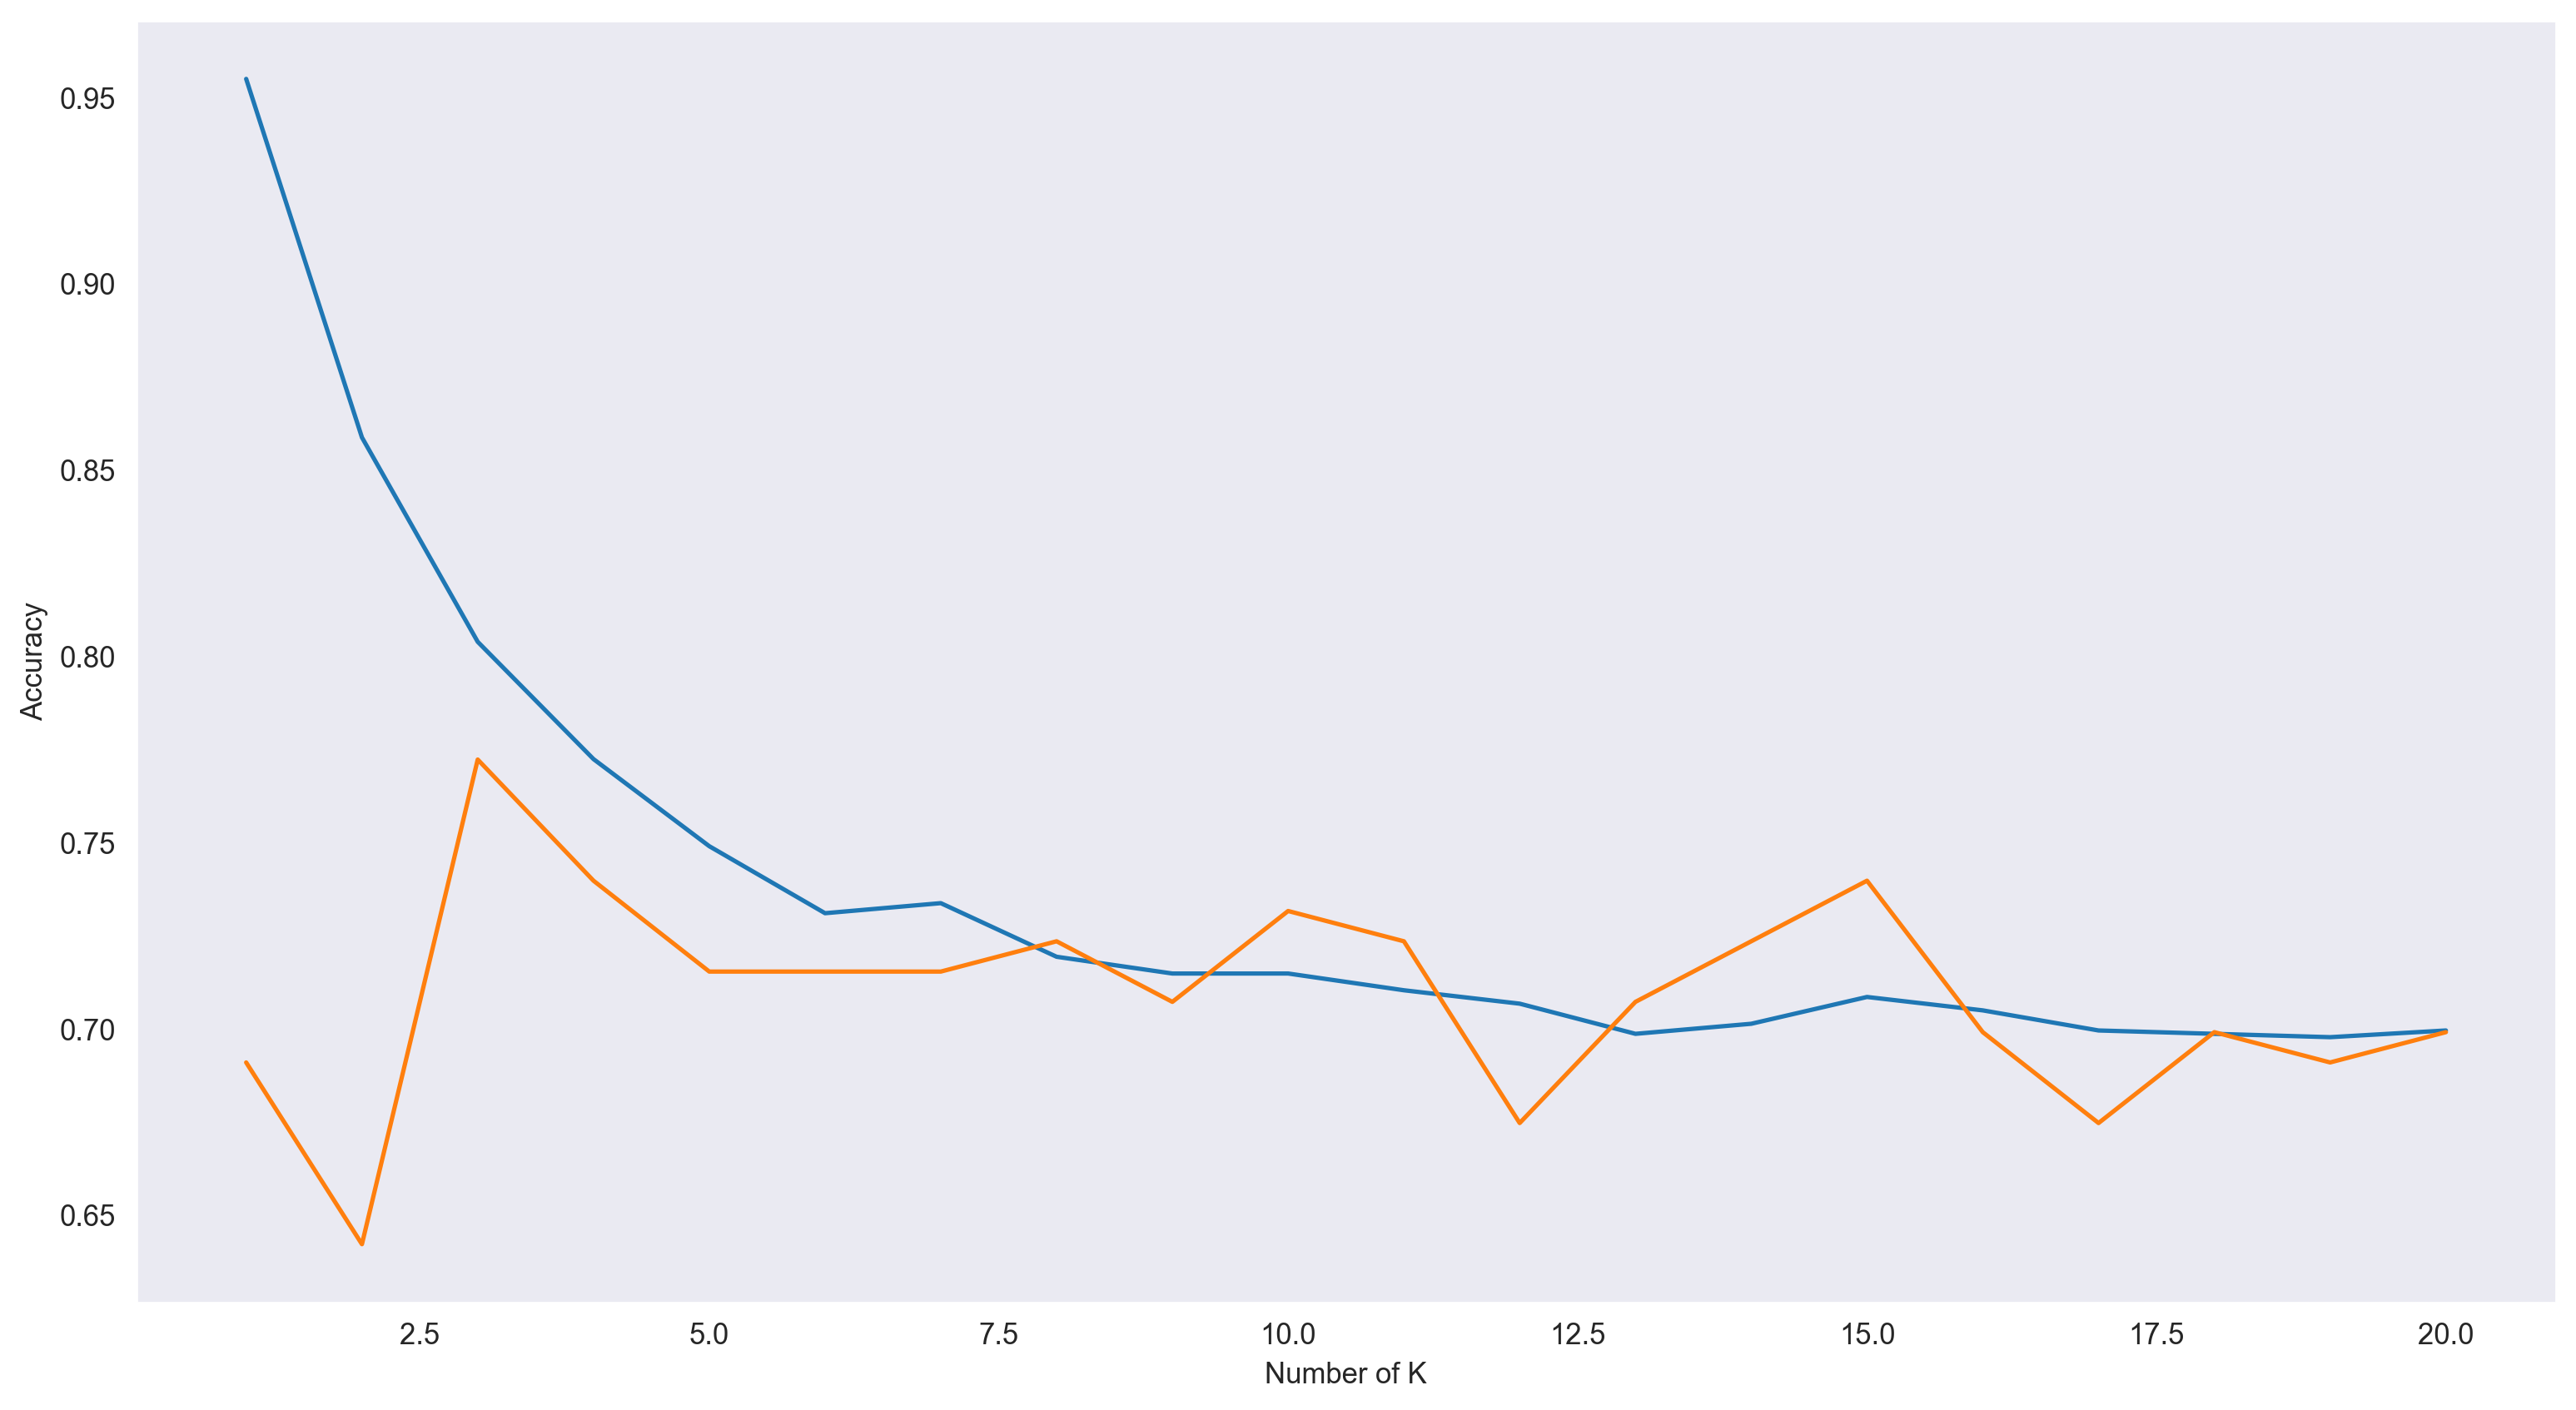

In [45]:
trainac = []
testac = []

for i in range(1,21):
    knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=i),n_estimators = 10)
    knn.fit(xtrain,ytrain)
    ypred = knn.predict(xtest)
    
    trainac.append(knn.score(xtrain,ytrain))
    testac.append(knn.score(xtest,ytest))

plt.title('')
plt.plot(range(1,21),trainac)
plt.plot(range(1,21), testac)
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.grid()

In [48]:
predict(KNeighborsClassifier(n_neighbors=7))

Creating Model With KNeighborsClassifier(n_neighbors=7)
Training Accuracy of are Model is : 0.73%
Testing Accuracy of are Model is : 0.72%
              precision    recall  f1-score   support

           0       0.56      0.70      0.62        33
           1       0.77      0.53      0.62        19
           2       0.81      0.79      0.80        71

    accuracy                           0.72       123
   macro avg       0.71      0.67      0.68       123
weighted avg       0.74      0.72      0.73       123



#### Tuning SVC 

In [53]:
params = {
    'kernel' : ['poly','rbf','linear','sigmoid'],
    'C' : [0.1,0.001,0.0001,1,10],
    'gamma' : [0.1,0.001,1,10],
    'decision_function_shape': ['ovo', 'ovr'],
    'cache_size' : [100,200,300,400,500]
}

In [54]:
grid = GridSearchCV(SVC(), param_grid=params, verbose=1, n_jobs=-1)

grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 0.001, 0.0001, 1, 10],
                         'cache_size': [100, 200, 300, 400, 500],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': [0.1, 0.001, 1, 10],
                         'kernel': ['poly', 'rbf', 'linear', 'sigmoid']},
             verbose=1)

In [55]:
grid.best_params_

{'C': 10,
 'cache_size': 100,
 'decision_function_shape': 'ovo',
 'gamma': 0.001,
 'kernel': 'sigmoid'}

In [87]:
predict(SVC(C=10, cache_size=100, decision_function_shape = 'ovo', gamma=0.001, kernel= 'sigmoid'))

Creating Model With SVC(C=10, cache_size=100, decision_function_shape='ovo', gamma=0.001,
    kernel='sigmoid')
Training Accuracy of are Model is : 0.69%
Testing Accuracy of are Model is : 0.74%
              precision    recall  f1-score   support

           0       0.56      0.73      0.63        33
           1       0.81      0.68      0.74        19
           2       0.84      0.76      0.80        71

    accuracy                           0.74       123
   macro avg       0.74      0.72      0.72       123
weighted avg       0.76      0.74      0.75       123



#### Tuning Voting Classifier

In [91]:
models = []

models.append(('rf',RandomForestClassifier( criterion = 'log_loss',  max_depth = 5,  max_features = 'sqrt',  min_samples_leaf = 5,min_samples_split = 2,  min_weight_fraction_leaf = 0,  n_estimators= 50)))
models.append(('gb',BaggingClassifier(GradientBoostingClassifier(criterion = 'squared_error', n_estimators=4, learning_rate = 0.5, loss='deviance',max_features='auto'))))
models.append(('knn',KNeighborsClassifier(n_neighbors=7)))

In [92]:
predict(VotingClassifier(estimators=models, voting = 'soft'))

Creating Model With VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(criterion='log_loss',
                                                     max_depth=5,
                                                     min_samples_leaf=5,
                                                     min_weight_fraction_leaf=0,
                                                     n_estimators=50)),
                             ('gb',
                              BaggingClassifier(estimator=GradientBoostingClassifier(criterion='squared_error',
                                                                                     learning_rate=0.5,
                                                                                     loss='deviance',
                                                                                     max_features='auto',
                                                                                     n_estimators=4))),
             

In [93]:
predict(VotingClassifier(estimators=models, voting = 'hard'))

Creating Model With VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(criterion='log_loss',
                                                     max_depth=5,
                                                     min_samples_leaf=5,
                                                     min_weight_fraction_leaf=0,
                                                     n_estimators=50)),
                             ('gb',
                              BaggingClassifier(estimator=GradientBoostingClassifier(criterion='squared_error',
                                                                                     learning_rate=0.5,
                                                                                     loss='deviance',
                                                                                     max_features='auto',
                                                                                     n_estimators=4))),
             

#### Tuning Stacking Classifier

In [116]:
predict(StackingClassifier( estimators = models,
                            final_estimator = SVC()))

Creating Model With StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(criterion='log_loss',
                                                       max_depth=5,
                                                       min_samples_leaf=5,
                                                       min_weight_fraction_leaf=0,
                                                       n_estimators=50)),
                               ('gb',
                                BaggingClassifier(estimator=GradientBoostingClassifier(criterion='squared_error',
                                                                                       learning_rate=0.5,
                                                                                       loss='deviance',
                                                                                       max_features='auto',
                                                                                       n_estima

### Creating Final Model With Hyperparameter Value

In [117]:
final_model = StackingClassifier( estimators = models,
                            final_estimator = SVC())
final_model.fit(xtrain,ytrain)
ypred = final_model.predict(xtest)

#### Evaluating The Model

##### Creating Classification Report

In [118]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.54      0.76      0.63        33
           1       0.77      0.53      0.62        19
           2       0.83      0.75      0.79        71

    accuracy                           0.72       123
   macro avg       0.71      0.68      0.68       123
weighted avg       0.74      0.72      0.72       123



##### Comparing Training And Testing Accuracy

In [119]:
print('Training Accuracy of are Model is : ' + str(round(final_model.score(xtrain,ytrain),2))+' %')
print('Testing Accuracy of are Model is : ' + str(round(final_model.score(xtest, ytest),2))+' %')

Training Accuracy of are Model is : 0.74 %
Testing Accuracy of are Model is : 0.72 %


## Creating CSV

In [121]:
pred = final_model.predict(test)

pred

array([0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2,
       2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 1,
       2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0,
       0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0,
       2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 0, 1, 2, 0, 0, 2,
       2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0,
       2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 1, 0, 1, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 1, 2, 2, 1, 2, 2, 1, 2, 0, 0, 2,

In [129]:
submission = pd.DataFrame({ 'id' : range(1235,2059),
                            'outcome' : pred})

submission


,id,outcome
0,1235,0
1,1236,2
2,1237,0
3,1238,2
4,1239,0
...,...,...
819,2054,2
820,2055,2
821,2056,0
822,2057,0


In [130]:
submission['outcome'].replace(0,'died', inplace=True)
submission['outcome'].replace(1,'euthanized', inplace=True)
submission['outcome'].replace(2,'lived', inplace=True)

submission

,id,outcome
0,1235,died
1,1236,lived
2,1237,died
3,1238,lived
4,1239,died
...,...,...
819,2054,lived
820,2055,lived
821,2056,died
822,2057,died


In [ ]:
submission.to_csv('submission.csv', index=False)